In [5]:
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
from mshr import *
import dolfin as fn

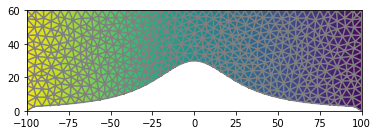

In [9]:



# Create mesh and define function space 
# domain = Rectangle(Point(-150,-150), Point(2500,150)) #25000000 15000000
# mountain = Circle(Point(4000000,-2400000),3200000) + Circle(Point(4000000,0.0),1760000) + Circle(Point(4000000,1120000),1440000) + Circle(Point(4000000,2000000),960000)
mesh = fn.Mesh('inv.xml')
markers = fn.MeshFunction("size_t", mesh, 'inv_physical_region.xml')
#boundaries = fn.MeshFunction('size_t', mesh, 'inv_facet_region.xml')
dx = fn.Measure('dx', domain=mesh, subdomain_data=markers)

##mountain = Mesh("phy.xml")
##cd=MeshFunction(‘size_t’,mesh,”geometry_physical_region.xml”);
mountain = mesh

plot(mountain)

#domain = domain #- mountain

#mesh = generate_mesh(domain, 550)
#mesh-=moutain

V = FunctionSpace(mesh, 'P', 1)


#inner_boundary = fn.DirichletBC(V, fn.Constant(5.0), boundaries, 1)
#outer_boundary = fn.DirichletBC(V, fn.Constant(0), boundaries, 2)
#bcs =[inner_boundary, outer_boundary]

# Define boundary condition 
u_D = Expression('x[0]==0 or x[0]==25000000 or x[1] == 1? 0.0 : -4*3000000*(x[0]-4000000)*(1 - ((x[0]-4000000)*(x[0]-4000000))/2 + ((x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000))/8 - ((x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000))/48 + ((x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000)*(x[0]-4000000))/(16*24))', degree=6)
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem 
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0.0)
cte = Constant(0.000004) #vitesse horizontale ~ 4.4m/s, et fréquence N ~ 0.012s-1 -> 0.002727 ?
a = - dot(grad(u), grad(v))*dx + cte*cte*u*v*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)

#Save solution to file in VTK format 
#vtkfile = File(’test_ondes.pvd’)
#vtkfile << u

# Compute error in L2 
normerror_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)
error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
#print('error_L2  =', error_L2)
#print('error_max =', error_max)

# Hold plot
plt.show()
